In [1]:
import sys
import os
import datetime
import time
import numpy as np
import pandas as pd
import pickle
import glob
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
def plot_sonyc_ap_stats(exp_dir):
    # stats 파일 목록 가져오기
    stats_files = sorted(glob.glob(f'{exp_dir}/stats_*.pickle'), 
                        key=lambda x: int(Path(x).stem.split('_')[1]))

    # 각 에폭별 SONYC 클래스 AP 값 저장
    epochs = []
    sonyc_aps = []  # 각 에폭별 SONYC 클래스 AP 값들
    sonyc_mean_aps = []  # 각 에폭별 SONYC 클래스 평균 AP

    for stats_file in stats_files:
        epoch = int(Path(stats_file).stem.split('_')[1])
        epochs.append(epoch)
        
        with open(stats_file, 'rb') as f:
            stats = pickle.load(f)
        
        # SONYC 클래스 AP 값 추출 (527번부터)
        epoch_aps = [stat['AP'] for stat in stats[527:]]
        sonyc_aps.append(epoch_aps)
        sonyc_mean_aps.append(np.mean(epoch_aps))

    # 클래스별 AP 변화 그래프
    plt.figure(figsize=(8, 4))
    for class_idx in range(len(sonyc_aps[0])):
        class_aps = [epoch_aps[class_idx] for epoch_aps in sonyc_aps]
        plt.plot(epochs, class_aps, label=f'Class {527 + class_idx}')

    plt.xlabel('Epoch')
    plt.ylabel('AP')
    plt.title('SONYC Class AP Values Across Epochs')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # 평균 AP 변화 그래프
    plt.figure(figsize=(8, 4))
    plt.plot(epochs, sonyc_mean_aps, 'r-', linewidth=2)
    plt.xlabel('Epoch')
    plt.ylabel('Mean AP')
    plt.title('Mean SONYC Class AP Across Epochs')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # 최종 에폭의 각 클래스별 AP 값
    final_epoch = epochs[-1]
    final_aps = sonyc_aps[-1]
    plt.figure(figsize=(8, 4))
    plt.bar(range(527, 527 + len(final_aps)), final_aps)
    plt.xlabel('Class Index')
    plt.ylabel('AP')
    plt.title(f'Final AP Values for Each SONYC Class (Epoch {final_epoch})')
    plt.xticks(range(527, 527 + len(final_aps)))
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()

    # 최종 결과 출력
    print(f'Final Mean SONYC AP: {sonyc_mean_aps[-1]:.4f}')
    # 최종 에폭의 각 클래스별 AP 값
    print('Final AP values for each class:')
    for idx, ap in enumerate(final_aps):
        print(f'Class {527 + idx}: {ap:.4f}')

    # 평균 AP가 가장 높은 에폭 찾기
    best_epoch_idx = np.argmax(sonyc_mean_aps)
    best_epoch = epochs[best_epoch_idx]
    best_mean_ap = sonyc_mean_aps[best_epoch_idx]

    print(f'\nBest Mean SONYC AP: {best_mean_ap:.4f} (Epoch {best_epoch})')
    print(f'Best AP values for each class (Epoch {best_epoch}):')
    for idx, ap in enumerate(sonyc_aps[best_epoch_idx]):
        print(f'Class {527 + idx}: {ap:.4f}')



In [3]:
def plot_sonyc_ap_stats_all(exp_dir):
    # stats 파일 목록 가져오기
    stats_files = sorted(glob.glob(f'{exp_dir}/stats_*.pickle'), 
                        key=lambda x: int(Path(x).stem.split('_')[1]))

    # 각 에폭별 SONYC 클래스 AP 값 저장
    epochs = []
    sonyc_aps = []  # 각 에폭별 SONYC 클래스 AP 값들
    sonyc_mean_aps = []  # 각 에폭별 SONYC 클래스 평균 AP
    sonyc_class_indices = None  # SONYC 클래스 인덱스 저장

    for stats_file in stats_files:
        epoch = int(Path(stats_file).stem.split('_')[1])
        epochs.append(epoch)
        
        with open(stats_file, 'rb') as f:
            stats = pickle.load(f)
        
        # AP 값이 있는 클래스 인덱스 찾기
        if sonyc_class_indices is None:
            sonyc_class_indices = [idx for idx, stat in enumerate(stats) if stat['AP']]
        
        # 찾은 클래스들의 AP 값 추출
        epoch_aps = [stats[idx]['AP'] for idx in sonyc_class_indices]
        sonyc_aps.append(epoch_aps)
        sonyc_mean_aps.append(np.mean(epoch_aps))

    # 클래스별 AP 변화 그래프
    plt.figure(figsize=(10, 6))
    for class_idx, original_idx in enumerate(sonyc_class_indices):
        class_aps = [epoch_aps[class_idx] for epoch_aps in sonyc_aps]
        plt.plot(epochs, class_aps, label=f'Class {original_idx}')

    plt.xlabel('Epoch')
    plt.ylabel('AP')
    plt.title('SONYC Class AP Values Across Epochs')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # 평균 AP 변화 그래프
    plt.figure(figsize=(10, 4))
    plt.plot(epochs, sonyc_mean_aps, 'r-', linewidth=2)
    plt.xlabel('Epoch')
    plt.ylabel('Mean AP')
    plt.title('Mean SONYC Class AP Across Epochs')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # 최종 에폭의 각 클래스별 AP 값
    final_epoch = epochs[-1]
    final_aps = sonyc_aps[-1]
    plt.figure(figsize=(10, 4))

    # x축 값을 문자열로 변환
    x_labels = [str(idx) for idx in sonyc_class_indices]
    x_positions = range(len(x_labels))

    plt.bar(x_positions, final_aps)
    plt.xlabel('Class Index')
    plt.ylabel('AP')
    plt.title(f'Final AP Values for Each SONYC Class (Epoch {final_epoch})')
    plt.xticks(x_positions, x_labels, rotation=90)
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()

    # 최종 결과 출력
    print(f'Final Mean SONYC AP: {sonyc_mean_aps[-1]:.4f}')
    # 최종 에폭의 각 클래스별 AP 값
    print('Final AP values for each class:')
    for idx, ap in zip(sonyc_class_indices, final_aps):
        print(f'Class {idx}: {ap:.4f}')

    # 평균 AP가 가장 높은 에폭 찾기
    best_epoch_idx = np.argmax(sonyc_mean_aps)
    best_epoch = epochs[best_epoch_idx]
    best_mean_ap = sonyc_mean_aps[best_epoch_idx]

    print(f'\nBest Mean SONYC AP: {best_mean_ap:.4f} (Epoch {best_epoch})')
    print(f'Best AP values for each class (Epoch {best_epoch}):')
    for idx, ap in zip(sonyc_class_indices, sonyc_aps[best_epoch_idx]):
        print(f'Class {idx}: {ap:.4f}')

Available experiment directories:
- /mnt/ssd_disk/github/whisper-at/src/whisper_at_train/exp/combined-ft-audioset_sonyc-whisper-high-lw_tr_1_8-large-v1-1e-5-15-0.75-ep30-bs48-ldaFalse-ls0.1-mix0.5-0-10-2505090308


/home/taemyung_heo/.cache/pypoetry/virtualenvs/whisper-at-z6hdRBdT-py3.10/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/taemyung_heo/.cache/pypoetry/virtualenvs/whisper-at-z6hdRBdT-py3.10/lib/python3.10/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/var/tmp/ipykernel_1786868/2313910771.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


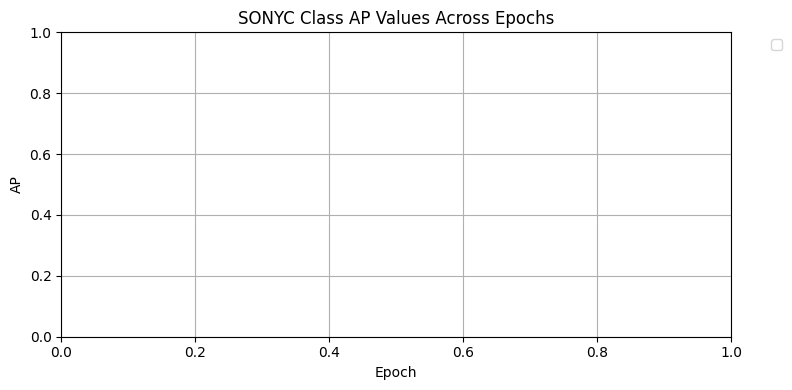

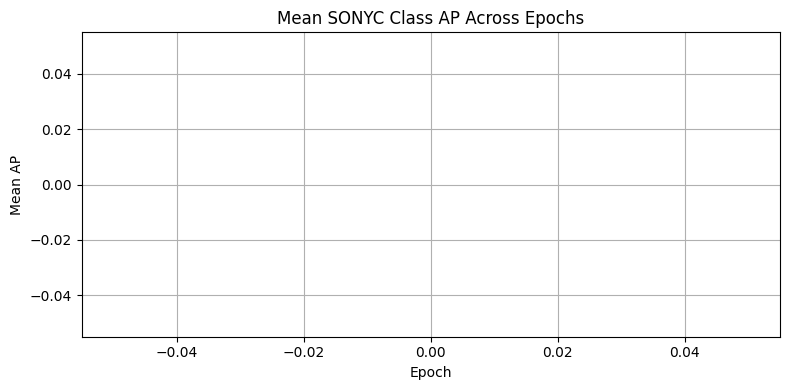

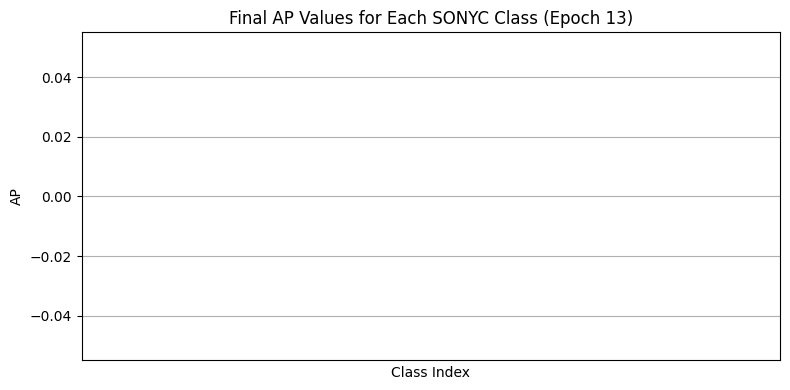

Final Mean SONYC AP: nan
Final AP values for each class:

Best Mean SONYC AP: nan (Epoch 1)
Best AP values for each class (Epoch 1):
- /mnt/ssd_disk/github/whisper-at/src/whisper_at_train/exp/combined-ft-audioset_sonyc-whisper-high-lw_tr_1_8-large-v1-1e-5-15-0.75-ep30-bs48-ldaFalse-ls0.1-mix0.5-0-10-2505090851


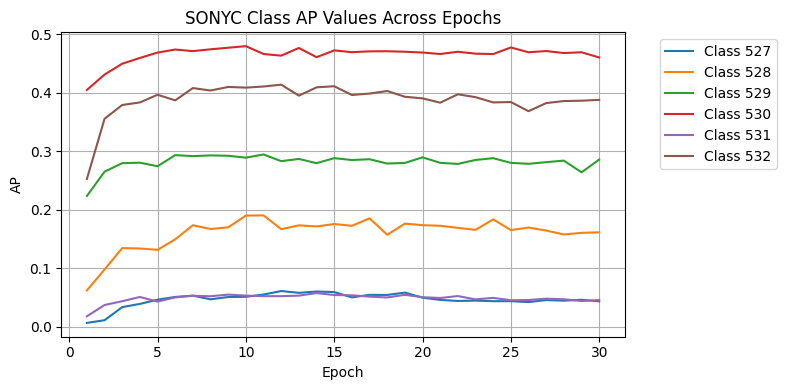

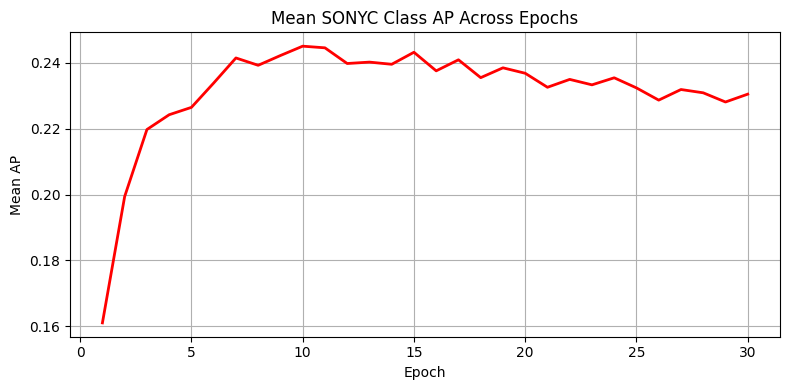

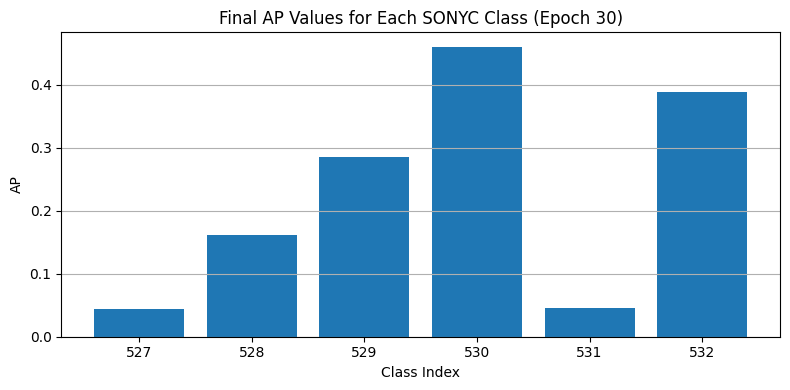

Final Mean SONYC AP: 0.2305
Final AP values for each class:
Class 527: 0.0433
Class 528: 0.1612
Class 529: 0.2855
Class 530: 0.4600
Class 531: 0.0454
Class 532: 0.3876

Best Mean SONYC AP: 0.2451 (Epoch 10)
Best AP values for each class (Epoch 10):
Class 527: 0.0510
Class 528: 0.1898
Class 529: 0.2888
Class 530: 0.4794
Class 531: 0.0530
Class 532: 0.4085
- /mnt/ssd_disk/github/whisper-at/src/whisper_at_train/exp/combined-ft-audioset_sonyc-whisper-high-lw_tr_1_8-large-v1-1e-5-15-0.75-ep30-bs48-ldaTrue-ls0.1-mix0.5-24-100-2505091345


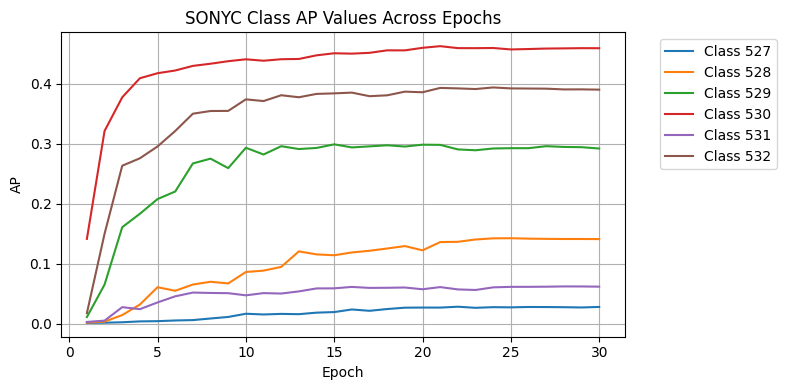

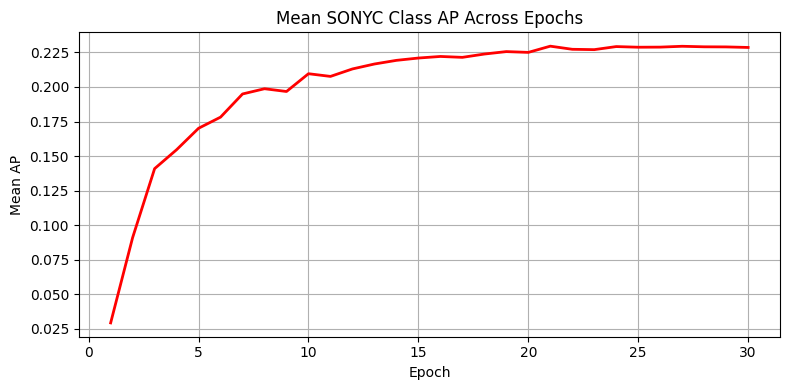

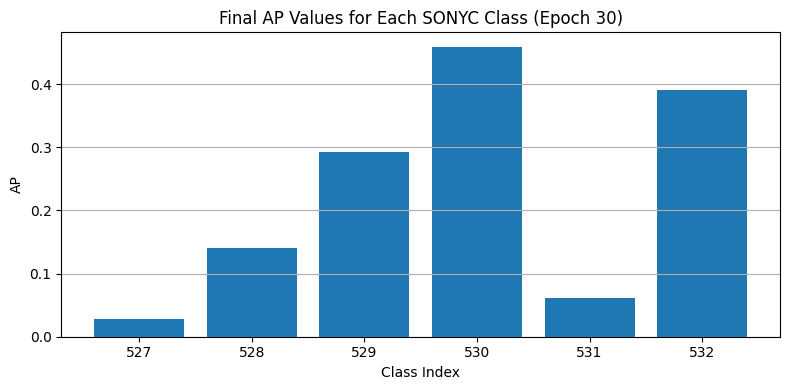

Final Mean SONYC AP: 0.2285
Final AP values for each class:
Class 527: 0.0279
Class 528: 0.1410
Class 529: 0.2919
Class 530: 0.4589
Class 531: 0.0617
Class 532: 0.3899

Best Mean SONYC AP: 0.2295 (Epoch 21)
Best AP values for each class (Epoch 21):
Class 527: 0.0268
Class 528: 0.1360
Class 529: 0.2979
Class 530: 0.4624
Class 531: 0.0610
Class 532: 0.3928
- /mnt/ssd_disk/github/whisper-at/src/whisper_at_train/exp/combined-ft-audioset_sonyc-whisper-high-lw_tr_1_8-large-v1-1e-5-15-0.75-ep30-bs48-ldaTrue-ls0.1-mix0.5-24-100-2505092233


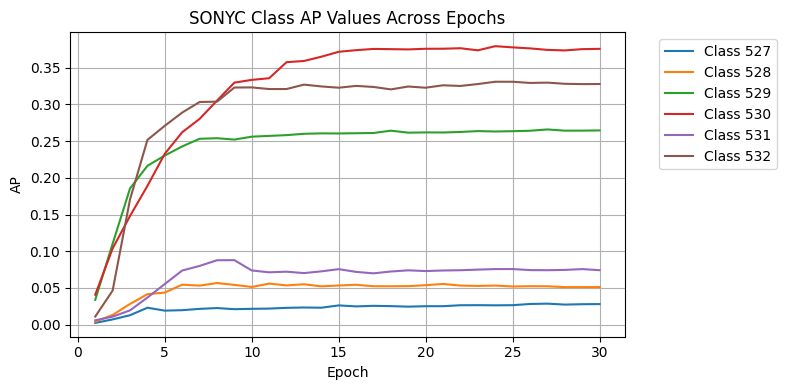

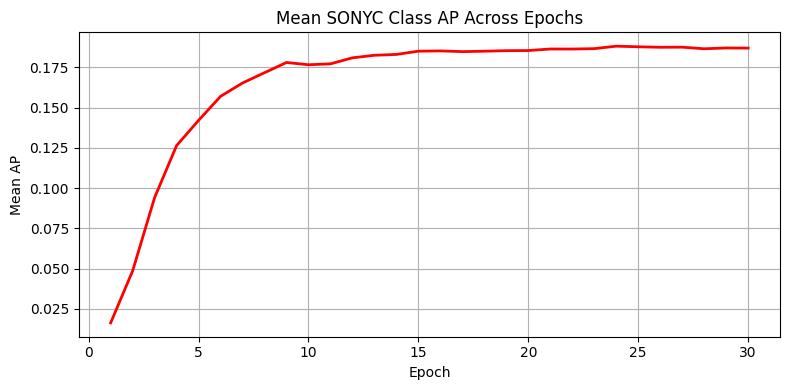

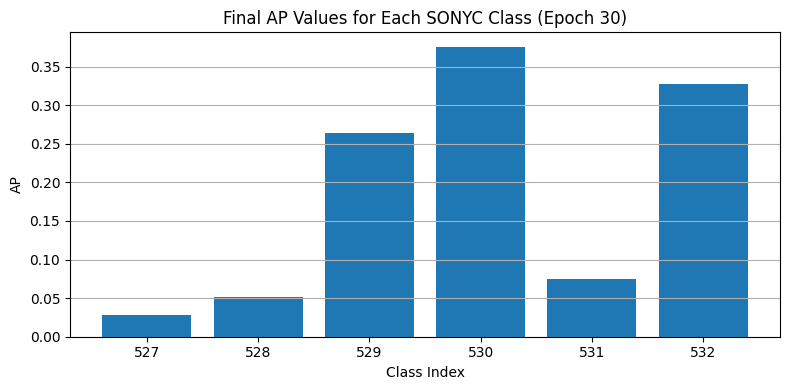

Final Mean SONYC AP: 0.1869
Final AP values for each class:
Class 527: 0.0280
Class 528: 0.0512
Class 529: 0.2646
Class 530: 0.3757
Class 531: 0.0742
Class 532: 0.3278

Best Mean SONYC AP: 0.1881 (Epoch 24)
Best AP values for each class (Epoch 24):
Class 527: 0.0263
Class 528: 0.0533
Class 529: 0.2632
Class 530: 0.3794
Class 531: 0.0757
Class 532: 0.3309
- /mnt/ssd_disk/github/whisper-at/src/whisper_at_train/exp/combined-ft-audioset_sonyc-whisper-high-lw_tr_1_8-large-v1-1e-5-15-0.75-ep30-bs48-ldaTrue-ls0.1-mix0.5-24-100-2505100304


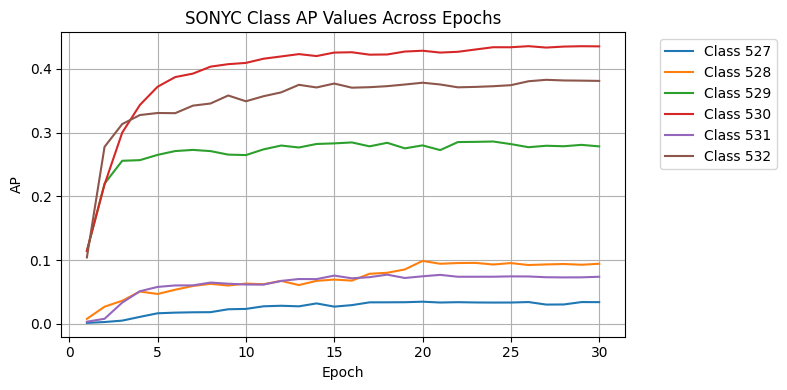

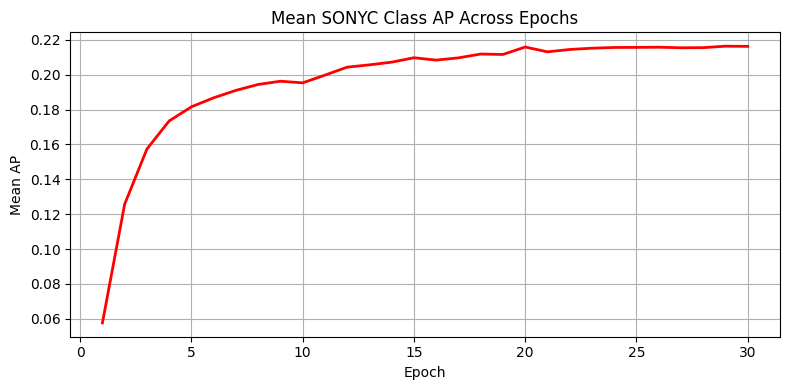

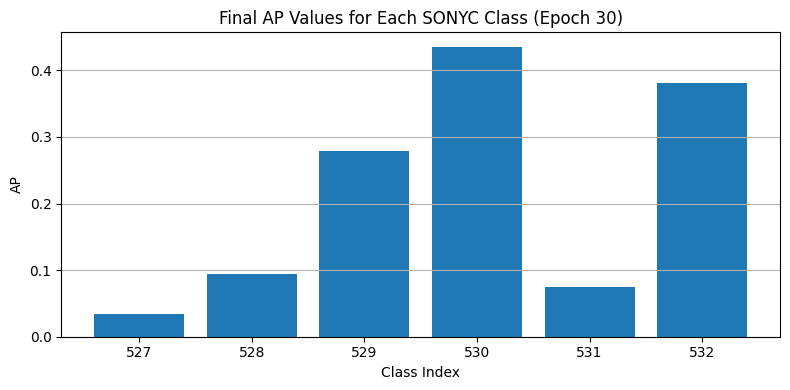

Final Mean SONYC AP: 0.2162
Final AP values for each class:
Class 527: 0.0341
Class 528: 0.0943
Class 529: 0.2784
Class 530: 0.4354
Class 531: 0.0739
Class 532: 0.3812

Best Mean SONYC AP: 0.2163 (Epoch 29)
Best AP values for each class (Epoch 29):
Class 527: 0.0342
Class 528: 0.0928
Class 529: 0.2809
Class 530: 0.4356
Class 531: 0.0730
Class 532: 0.3816
- /mnt/ssd_disk/github/whisper-at/src/whisper_at_train/exp/combined-ft-audioset_sonyc-whisper-high-lw_tr_1_8-large-v1-1e-6-15-0.75-ep50-bs48-ldaTrue-ls0.1-mix0.5-0-10-2505102307


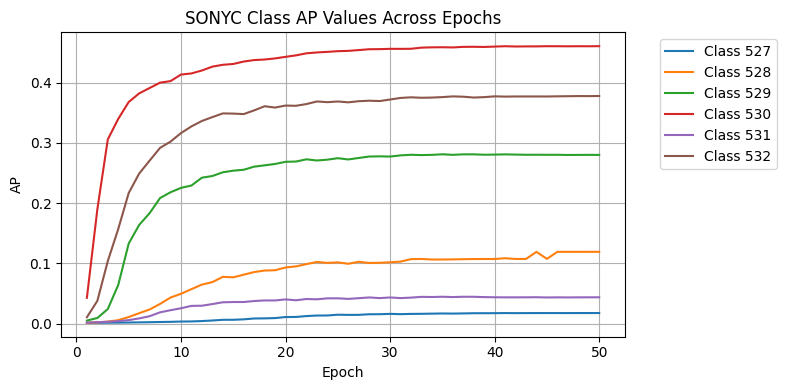

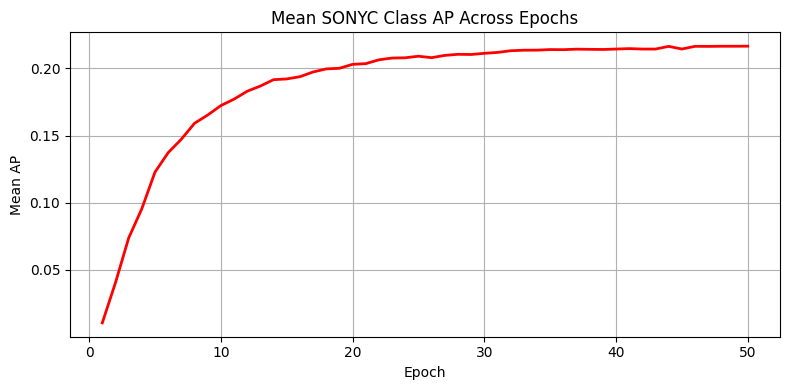

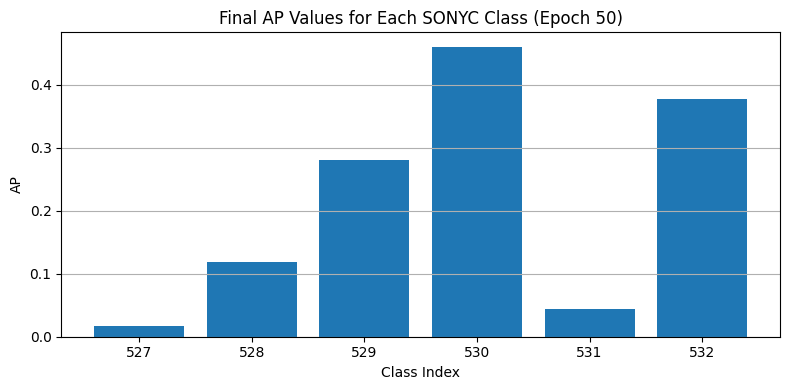

Final Mean SONYC AP: 0.2166
Final AP values for each class:
Class 527: 0.0177
Class 528: 0.1193
Class 529: 0.2801
Class 530: 0.4606
Class 531: 0.0438
Class 532: 0.3779

Best Mean SONYC AP: 0.2166 (Epoch 50)
Best AP values for each class (Epoch 50):
Class 527: 0.0177
Class 528: 0.1193
Class 529: 0.2801
Class 530: 0.4606
Class 531: 0.0438
Class 532: 0.3779
- /mnt/ssd_disk/github/whisper-at/src/whisper_at_train/exp/combined-ft-audioset_sonyc-whisper-high-lw_tr_1_8-large-v1-2e-6-15-0.75-ep50-bs48-ldaTrue-ls0.05-mix0.5-24-100-2505100820


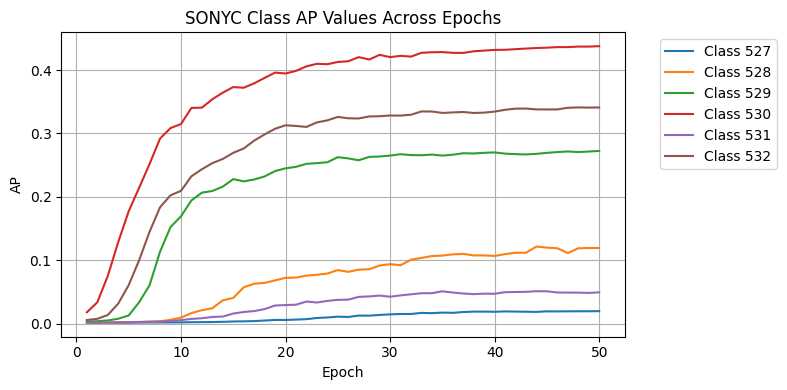

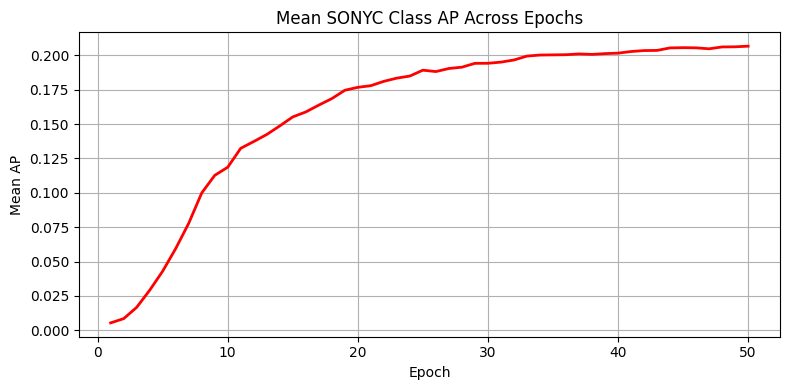

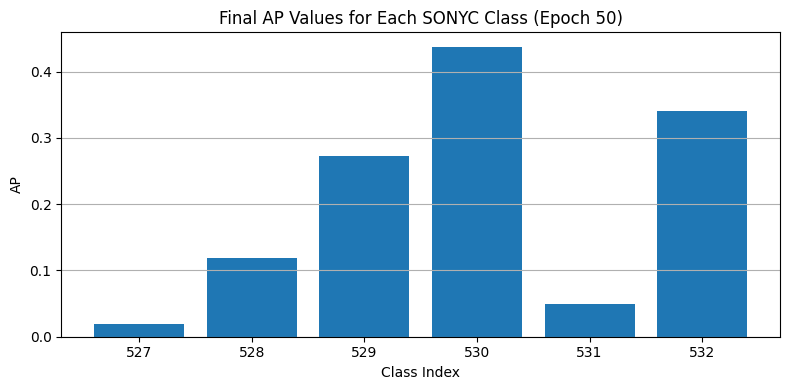

Final Mean SONYC AP: 0.2067
Final AP values for each class:
Class 527: 0.0200
Class 528: 0.1195
Class 529: 0.2724
Class 530: 0.4376
Class 531: 0.0495
Class 532: 0.3410

Best Mean SONYC AP: 0.2067 (Epoch 50)
Best AP values for each class (Epoch 50):
Class 527: 0.0200
Class 528: 0.1195
Class 529: 0.2724
Class 530: 0.4376
Class 531: 0.0495
Class 532: 0.3410
- /mnt/ssd_disk/github/whisper-at/src/whisper_at_train/exp/combined-ft-audioset_sonyc-whisper-high-lw_tr_1_8-large-v1-5e-6-15-0.75-ep50-bs48-ldaTrue-ls0.1-mix0.5-0-10-2505101611


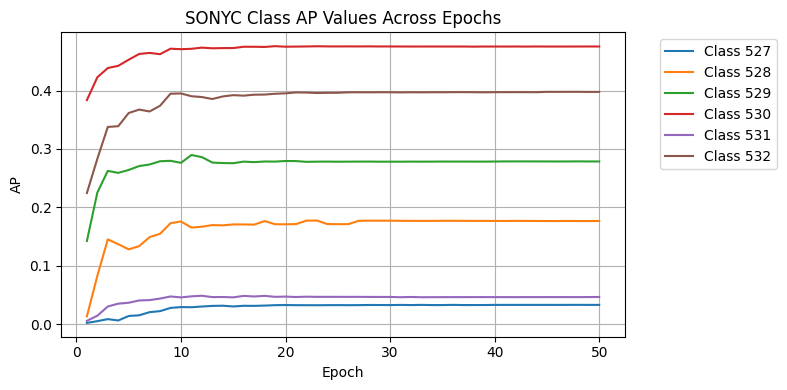

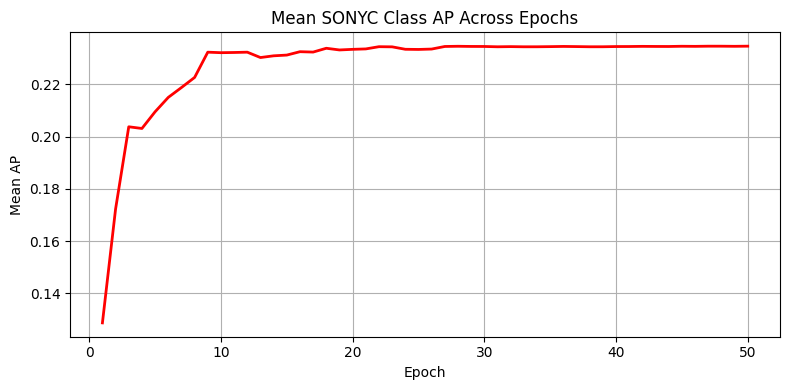

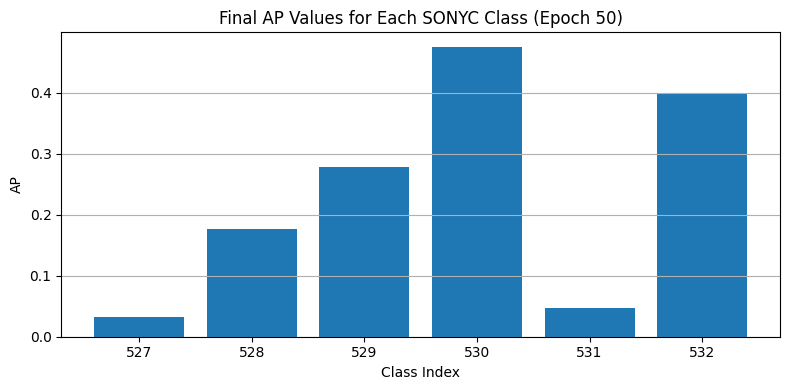

Final Mean SONYC AP: 0.2347
Final AP values for each class:
Class 527: 0.0331
Class 528: 0.1767
Class 529: 0.2786
Class 530: 0.4754
Class 531: 0.0466
Class 532: 0.3977

Best Mean SONYC AP: 0.2347 (Epoch 50)
Best AP values for each class (Epoch 50):
Class 527: 0.0331
Class 528: 0.1767
Class 529: 0.2786
Class 530: 0.4754
Class 531: 0.0466
Class 532: 0.3977


In [4]:
# exp 디렉토리 경로
exp_base_dir = '/mnt/ssd_disk/github/whisper-at/src/whisper_at_train/exp'

# 모든 실험 디렉토리 목록 가져오기
exp_dirs = sorted(glob.glob(f'{exp_base_dir}/combined-ft-*'), 
                 key=lambda x: Path(x).name)

# 디렉토리 이름만 추출
exp_dir_names = [Path(d).name for d in exp_dirs]

print("Available experiment directories:")
for dir_name in exp_dirs:
    print(f"- {dir_name}")
    plot_sonyc_ap_stats(dir_name)
    print("="*80)

In [5]:
def plot_multiple_experiments(exp_dirs, exp_names):
    """
    Plot AP values for multiple experiments on the same graph.
    
    Args:
        exp_dirs (list): List of experiment directory paths
        exp_names (list): List of experiment names for the legend
    """
    plt.figure(figsize=(10, 6))
    
    for exp_dir, exp_name in zip(exp_dirs, exp_names):
        # Get stats files for this experiment
        stats_files = sorted(glob.glob(f'{exp_dir}/stats_*.pickle'), 
                           key=lambda x: int(Path(x).stem.split('_')[1]))
        
        # Calculate mean AP for each epoch
        epochs = []
        mean_aps = []
        
        for stats_file in stats_files:
            epoch = int(Path(stats_file).stem.split('_')[1])
            epochs.append(epoch)
            
            with open(stats_file, 'rb') as f:
                stats = pickle.load(f)
                
            epoch_aps = [stat['AP'] for stat in stats if stat['AP']]
            mean_aps.append(np.mean(epoch_aps))
        
        # Plot mean AP curve for this experiment
        plt.plot(epochs, mean_aps, label=exp_name, marker='o', markersize=4)
    
    plt.xlabel('Epoch')
    plt.ylabel('Mean AP')
    plt.title('Mean SONYC Class AP Comparison Across Experiments')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

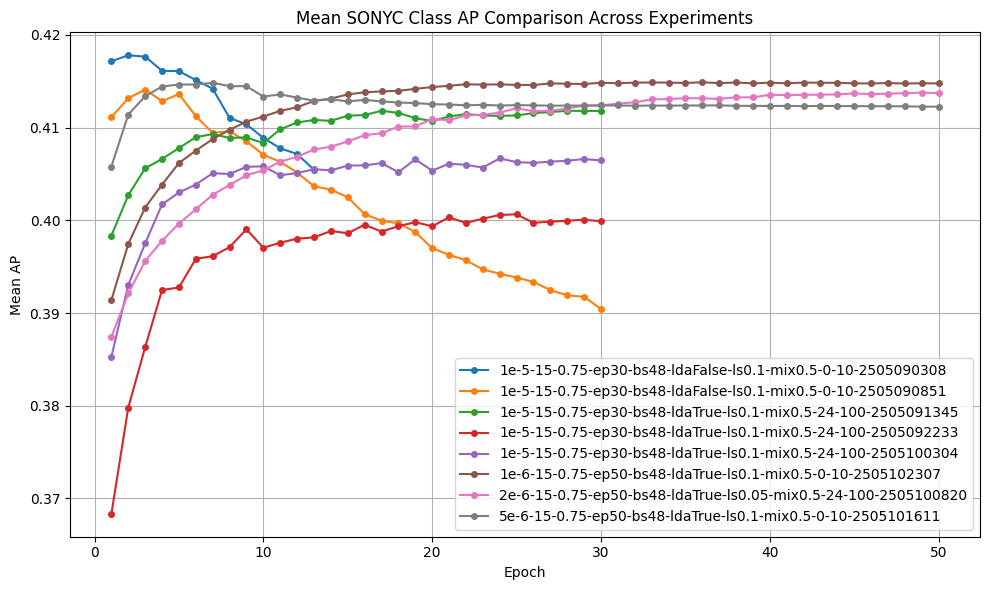

In [6]:
exp_base_dir = '/mnt/ssd_disk/github/whisper-at/src/whisper_at_train/exp'

# 모든 실험 디렉토리 목록 가져오기
exp_dirs = sorted(glob.glob(f'{exp_base_dir}/combined-ft-*'), 
                 key=lambda x: Path(x).name)

# 디렉토리 이름만 추출
exp_dir_names = [Path(d).name for d in exp_dirs]
exp_names = [s.split("/")[-1].replace("combined-ft-audioset_sonyc-whisper-high-lw_tr_1_8-large-v1-", "") for s in exp_dir_names]

plot_multiple_experiments(exp_dirs, exp_names)